In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

Dataset link : `https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download`

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df['Target']=df.sentiment.apply(lambda x: 1 if x=='positive' else 0)

In [ ]:
df

,review,sentiment,Target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [ ]:
df.shape

(50000, 3)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
rc=Pipeline([('Vectorizer',CountVectorizer()),('model',MultinomialNB())])


In [ ]:
from sklearn.model_selection import train_test_split
x=df['review']
y=df['Target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)


In [ ]:
x_train.shape

(47500,)

In [ ]:
x_test.shape

(2500,)

In [ ]:
rc.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [ ]:
rc.score(x_test,y_test)*100

85.08

In [ ]:
y_pred=rc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm=confusion_matrix(y_test,y_pred)
cm

array([[1107,  153],
       [ 220, 1020]])

Text(50.722222222222214, 0.5, 'Truth')

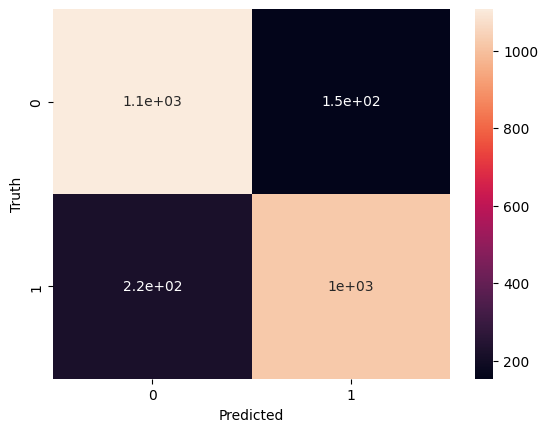

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

accuracy_score(y_test,y_pred)

0.8508

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1260
           1       0.87      0.82      0.85      1240

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500

